# **API with Python**

**APi** stands on Application programming interface

**RSET** stands on Representational State Transfer

**json** stands on JavaScript Object Notation

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import plotly.io as pio
import plotly.express as px
from collections import Counter
pio.templates.default = 'plotly_white'
from pandas import json_normalize

# **API Stackoverflow**
- Extract information about Badges

#### **Discussion**

Returns all the badges in the system.

Badge sorts are a tad complicated. For the purposes of sorting (and min/max) tag_based is considered to be greater than named.

This means that you can get a list of all tag based badges by passing min=tag_based, and conversely all the named badges by passing max=named, with sort=type.

For ranks, bronze is greater than silver which is greater than gold. Along with sort=rank, set max=gold for just gold badges, max=silver&min=silver for just silver, and min=bronze for just bronze.

rank is the default sort.

This method returns a list of badges.

- Extract information about Questions


#### **Discussion**

Gets all the questions on the site.

This method allows you make fairly flexible queries across the entire corpus of questions on a site. For example, getting all questions asked in the the week of Jan 1st 2011 with scores of 10 or more is a single query with parameters sort=votes&min=10&fromdate=1293840000&todate=1294444800.

To constrain questions returned to those with a set of tags, use the tagged parameter with a semi-colon delimited list of tags. This is an and constraint, passing tagged=c;java will return only those questions with both tags. As such, passing more than 5 tags will always return zero results.

The sorts accepted by this method operate on the following fields of the question object:

activity – last_activity_date
creation – creation_date
votes – score
hot – by the formula ordering the hot tab
Does not accept min or max
week – by the formula ordering the week tab
Does not accept min or max
month – by the formula ordering the month tab
Does not accept min or max
activity is the default sort.

<center>
<img align="center" src="12.png"     style=" width:400px; padding: 20px; " > 
<center>


It is possible to create moderately complex queries using sort, min, max, fromdate, and todate.
This method returns a list of questions.

### **Extract information about Questions**


In [3]:
ques_sta_req = requests.get('https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&site=stackoverflow')

In [4]:
ques_js = ques_sta_req.json()

In [5]:
ques_js

{'items': [{'tags': ['find', 'path-finding', 'dolphindb', 'hit', 'findfirst'],
   'owner': {'account_id': 22560983,
    'reputation': 133,
    'user_id': 16748629,
    'user_type': 'registered',
    'profile_image': 'https://www.gravatar.com/avatar/43e1ab2e6d09c649b9849fbec0d281e8?s=256&d=identicon&r=PG&f=1',
    'display_name': 'winnie',
    'link': 'https://stackoverflow.com/users/16748629/winnie'},
   'is_answered': False,
   'view_count': 22,
   'answer_count': 2,
   'score': 0,
   'last_activity_date': 1673833271,
   'creation_date': 1673575630,
   'question_id': 75104180,
   'content_license': 'CC BY-SA 4.0',
   'link': 'https://stackoverflow.com/questions/75104180/get-the-index-of-the-first-element-in-an-array-that-meets-the-specified-conditio',
   'title': 'Get the index of the first element in an array that meets the specified condition'},
  {'tags': ['binary',
    'bit-manipulation',
    'computer-science',
    'twos-complement',
    'data-representation'],
   'owner': {'acco

In [6]:
ques_dist = ques_js['items']

In [7]:
ques_df = pd.DataFrame(ques_dist)

In [8]:
ques_df

,tags,owner,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,content_license,link,title,protected_date,accepted_answer_id,community_owned_date,last_edit_date,closed_date,closed_reason,bounty_amount,bounty_closes_date
0,"[find, path-finding, dolphindb, hit, findfirst]","{'account_id': 22560983, 'reputation': 133, 'u...",False,22,2,0,1673833271,1673575630,75104180,CC BY-SA 4.0,https://stackoverflow.com/questions/75104180/g...,Get the index of the first element in an array...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[binary, bit-manipulation, computer-science, t...","{'account_id': 9780, 'reputation': 24811, 'use...",True,466920,24,492,1673833257,1246029698,1049722,CC BY-SA 4.0,https://stackoverflow.com/questions/1049722/wh...,What is “two&#39;s complement”?,1.592214e+09,1049774.0,1.246030e+09,1.673831e+09,NaN,NaN,NaN,NaN
2,"[python-3.x, model-view-controller, pyqt]","{'account_id': 27538559, 'reputation': 1, 'use...",False,7,0,0,1673833239,1673832288,75129527,CC BY-SA 4.0,https://stackoverflow.com/questions/75129527/p...,PyQt5 - update QAbstractTableModel and retriev...,NaN,NaN,NaN,1.673833e+09,NaN,NaN,NaN,NaN
3,[zola],"{'account_id': 9166056, 'reputation': 123, 'us...",False,4,0,0,1673833239,1673832500,75129534,CC BY-SA 4.0,https://stackoverflow.com/questions/75129534/d...,Do I need to have a _index.md to loop over fil...,NaN,NaN,NaN,1.673833e+09,NaN,NaN,NaN,NaN
4,"[python, dictionary, config]","{'account_id': 21110786, 'reputation': 17, 'us...",False,11,1,0,1673833236,1673831470,75129477,CC BY-SA 4.0,https://stackoverflow.com/questions/75129477/m...,Multi-Level Configs Using config.setdefault(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[math, image-processing, deep-learning, neural...","{'account_id': 8074962, 'reputation': 153, 'us...",False,2,0,0,1673833236,1673833236,75129585,CC BY-SA 4.0,https://stackoverflow.com/questions/75129585/i...,Is it possible to create a function which perf...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[javascript, express, cookies]","{'account_id': 21481623, 'reputation': 619, 'u...",False,6,0,0,1673833233,1673832407,75129530,CC BY-SA 4.0,https://stackoverflow.com/questions/75129530/t...,this set cookie header didn&#39;t specify a sa...,NaN,NaN,NaN,1.673833e+09,NaN,NaN,NaN,NaN
7,[python],"{'account_id': 22268675, 'reputation': 53, 'us...",False,8,0,-1,1673833233,1673833126,75129578,CC BY-SA 4.0,https://stackoverflow.com/questions/75129578/w...,What I should I do to solve this array list pr...,NaN,NaN,NaN,1.673833e+09,NaN,NaN,NaN,NaN
8,"[php, forms]","{'account_id': 18468382, 'reputation': 1, 'use...",False,2,0,0,1673833219,1673833219,75129584,CC BY-SA 4.0,https://stackoverflow.com/questions/75129584/a...,AutoConvert Bengali Number to English Number w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[python, getter-setter]","{'account_id': 27538717, 'reputation': 1, 'use...",False,9,1,0,1673833203,1673832965,75129568,CC BY-SA 4.0,https://stackoverflow.com/questions/75129568/i...,Issue with setting an attribute using getters ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tags                  30 non-null     object 
 1   owner                 30 non-null     object 
 2   is_answered           30 non-null     bool   
 3   view_count            30 non-null     int64  
 4   answer_count          30 non-null     int64  
 5   score                 30 non-null     int64  
 6   last_activity_date    30 non-null     int64  
 7   creation_date         30 non-null     int64  
 8   question_id           30 non-null     int64  
 9   content_license       27 non-null     object 
 10  link                  30 non-null     object 
 11  title                 30 non-null     object 
 12  protected_date        1 non-null      float64
 13  accepted_answer_id    2 non-null      float64
 14  community_owned_date  1 non-null      float64
 15  last_edit_date        16 

In [10]:
ques_df.columns

Index(['tags', 'owner', 'is_answered', 'view_count', 'answer_count', 'score',
       'last_activity_date', 'creation_date', 'question_id', 'content_license',
       'link', 'title', 'protected_date', 'accepted_answer_id',
       'community_owned_date', 'last_edit_date', 'closed_date',
       'closed_reason', 'bounty_amount', 'bounty_closes_date'],
      dtype='object')

### **How many questions in the stack overflow were answered?**

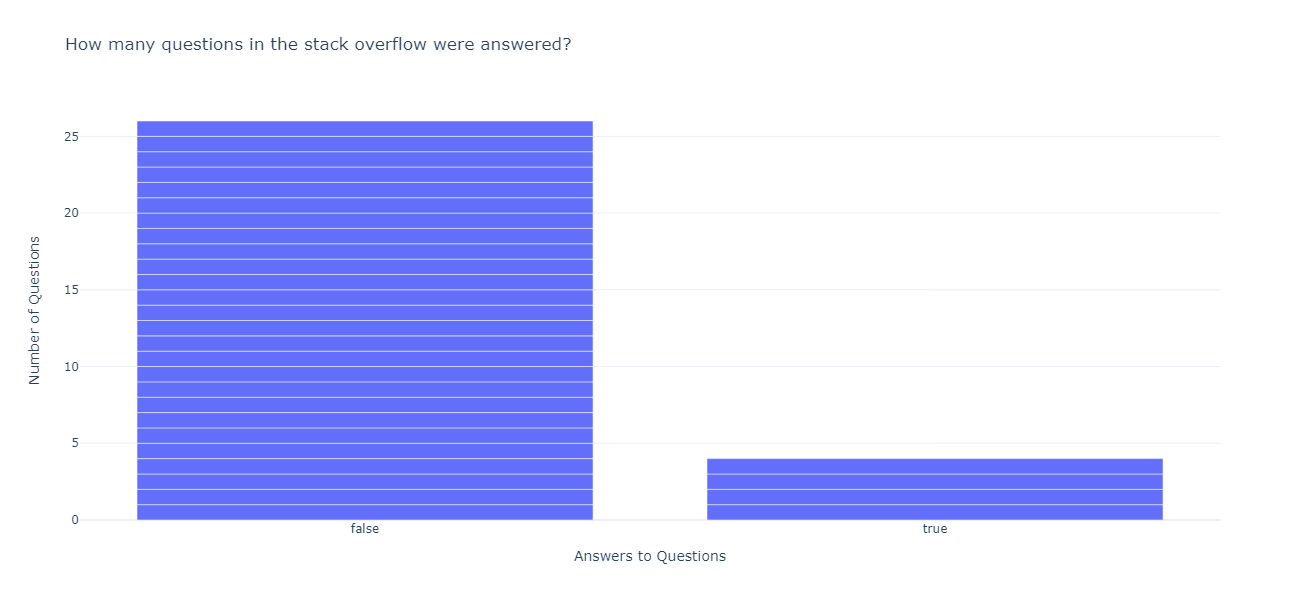

In [11]:
fig2 = px.bar(ques_df,
        x='is_answered',
        title="How many questions in the stack overflow were answered?",
        labels={
                     "is_answered": "Answers to Questions",
                     "count": "Number of Questions"
                 },
                 width=1300, height=600
        )

fig2.show("png")        

### **What is the most popular programming language that people ask about?**

In [12]:
ques_df['tags']

0       [find, path-finding, dolphindb, hit, findfirst]
1     [binary, bit-manipulation, computer-science, t...
2             [python-3.x, model-view-controller, pyqt]
3                                                [zola]
4                          [python, dictionary, config]
5     [math, image-processing, deep-learning, neural...
6                        [javascript, express, cookies]
7                                              [python]
8                                          [php, forms]
9                               [python, getter-setter]
10              [c#, asp.net, sql-server, sqlite, maui]
11                                        [azerothcore]
12                               [sql-server, unixodbc]
13                                            [unity3d]
14                  [c++, algorithm, merge, c++17, gnu]
15             [python, image, statistics, mean, stdev]
16                           [javascript, ecmascript-6]
17                             [javascript, svg,

In [13]:
listed_item = ques_df['tags'].to_list()

In [14]:
listed_item

[['find', 'path-finding', 'dolphindb', 'hit', 'findfirst'],
 ['binary',
  'bit-manipulation',
  'computer-science',
  'twos-complement',
  'data-representation'],
 ['python-3.x', 'model-view-controller', 'pyqt'],
 ['zola'],
 ['python', 'dictionary', 'config'],
 ['math', 'image-processing', 'deep-learning', 'neural-network'],
 ['javascript', 'express', 'cookies'],
 ['python'],
 ['php', 'forms'],
 ['python', 'getter-setter'],
 ['c#', 'asp.net', 'sql-server', 'sqlite', 'maui'],
 ['azerothcore'],
 ['sql-server', 'unixodbc'],
 ['unity3d'],
 ['c++', 'algorithm', 'merge', 'c++17', 'gnu'],
 ['python', 'image', 'statistics', 'mean', 'stdev'],
 ['javascript', 'ecmascript-6'],
 ['javascript', 'svg', 'd3.js'],
 ['node.js', 'selenium', 'selenium-webdriver', 'safari'],
 ['node.js', 'bash', 'macos', 'stream'],
 ['python', 'pandas', 'regex', 'dataframe'],
 ['kubernetes', 'kubernetes-helm'],
 ['java', 'arrays', 'arraylist'],
 ['javascript',
  'google-analytics',
  'google-analytics-api',
  'google-anal

In [15]:
listed_item=[type for subitem in listed_item for type in subitem]

In [16]:
listed_item

['find',
 'path-finding',
 'dolphindb',
 'hit',
 'findfirst',
 'binary',
 'bit-manipulation',
 'computer-science',
 'twos-complement',
 'data-representation',
 'python-3.x',
 'model-view-controller',
 'pyqt',
 'zola',
 'python',
 'dictionary',
 'config',
 'math',
 'image-processing',
 'deep-learning',
 'neural-network',
 'javascript',
 'express',
 'cookies',
 'python',
 'php',
 'forms',
 'python',
 'getter-setter',
 'c#',
 'asp.net',
 'sql-server',
 'sqlite',
 'maui',
 'azerothcore',
 'sql-server',
 'unixodbc',
 'unity3d',
 'c++',
 'algorithm',
 'merge',
 'c++17',
 'gnu',
 'python',
 'image',
 'statistics',
 'mean',
 'stdev',
 'javascript',
 'ecmascript-6',
 'javascript',
 'svg',
 'd3.js',
 'node.js',
 'selenium',
 'selenium-webdriver',
 'safari',
 'node.js',
 'bash',
 'macos',
 'stream',
 'python',
 'pandas',
 'regex',
 'dataframe',
 'kubernetes',
 'kubernetes-helm',
 'java',
 'arrays',
 'arraylist',
 'javascript',
 'google-analytics',
 'google-analytics-api',
 'google-analytics-4',
 

In [17]:
frequency = Counter(listed_item)

In [18]:
frequency

Counter({'find': 1,
         'path-finding': 1,
         'dolphindb': 1,
         'hit': 1,
         'findfirst': 1,
         'binary': 1,
         'bit-manipulation': 1,
         'computer-science': 1,
         'twos-complement': 1,
         'data-representation': 1,
         'python-3.x': 1,
         'model-view-controller': 1,
         'pyqt': 1,
         'zola': 1,
         'python': 6,
         'dictionary': 1,
         'config': 1,
         'math': 1,
         'image-processing': 1,
         'deep-learning': 1,
         'neural-network': 1,
         'javascript': 5,
         'express': 1,
         'cookies': 1,
         'php': 1,
         'forms': 1,
         'getter-setter': 1,
         'c#': 2,
         'asp.net': 1,
         'sql-server': 3,
         'sqlite': 1,
         'maui': 1,
         'azerothcore': 1,
         'unixodbc': 1,
         'unity3d': 1,
         'c++': 1,
         'algorithm': 1,
         'merge': 1,
         'c++17': 1,
         'gnu': 1,
         'image': 

In [19]:
df_count = pd.DataFrame.from_records(list(dict(frequency).items()), columns=['tags','count'])

In [20]:
pd.DataFrame.from_records(list(dict(frequency).items()), columns=['tags','count']).sort_values(by='count',ascending= False).head(5)

,tags,count
14,python,6
21,javascript,5
47,node.js,3
29,sql-server,3
27,c#,2


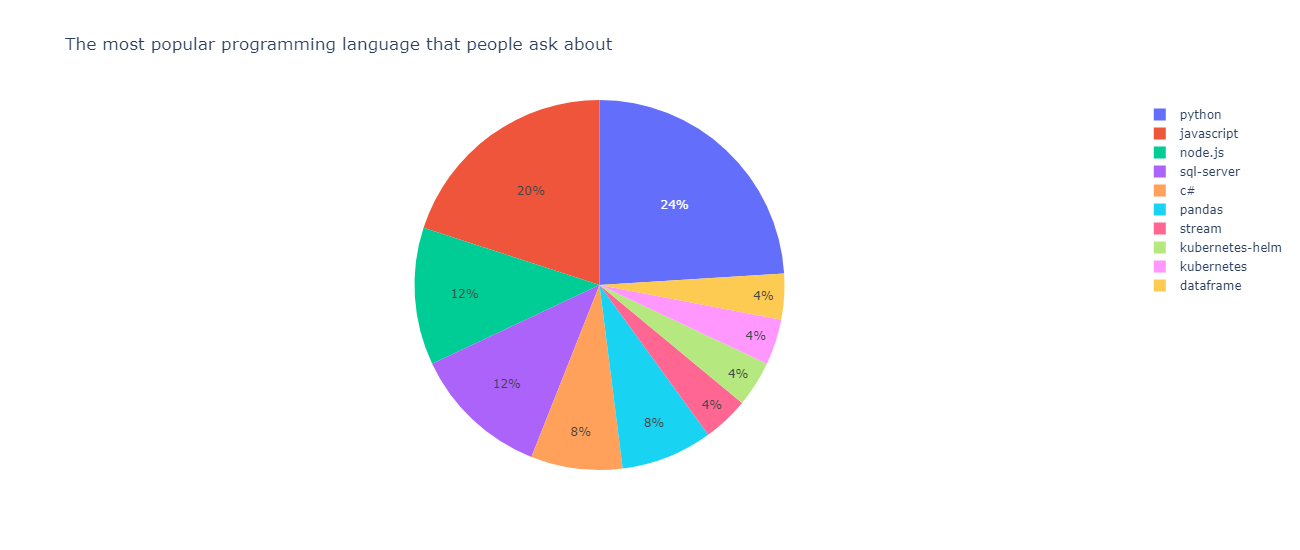

In [21]:
fig1 = px.pie(df_count.sort_values(by='count',ascending= False).head(10), 
        values='count', names='tags', 
        title='The most popular programming language that people ask about', width=1300, height=550)

fig1.show("png")

# **Thank You**